In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px
import gc

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Locate the file in Personal Machine
path = 'drive/MyDrive/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images'

In [ ]:
No_DR_Img = os.listdir(path + '/No_DR/')
Mild_Img = os.listdir(path + '/Mild/')
Moderate_Img = os.listdir(path + '/Moderate/')
Proliferate_DR_Img = os.listdir(path + '/Proliferate_DR/')
Severe_Img = os.listdir(path + '/Severe/')

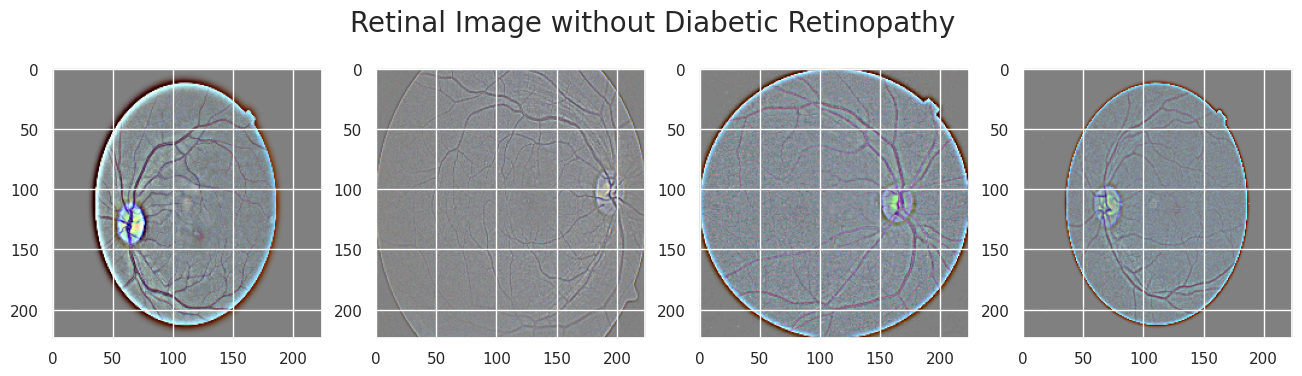

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/No_DR/'+ No_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image without Diabetic Retinopathy",fontsize=20)
plt.show()

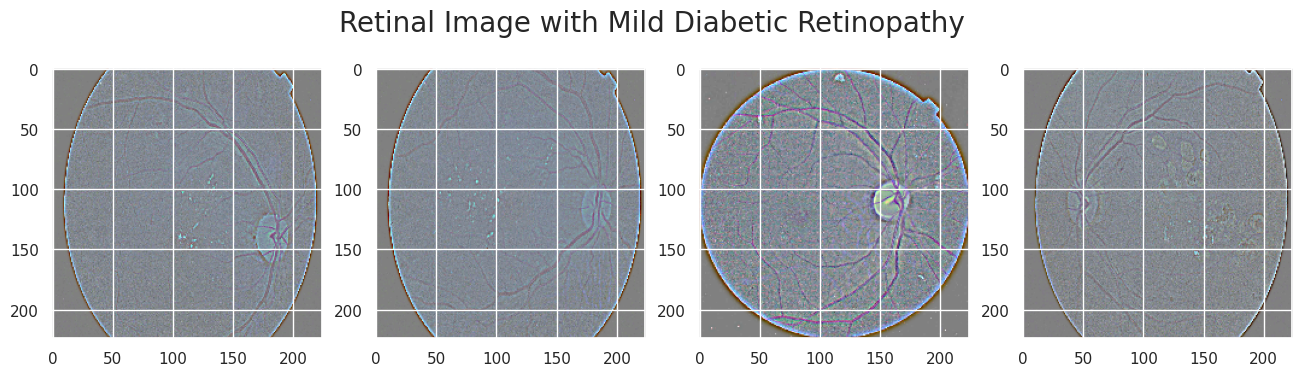

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Mild/'+ Mild_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Mild Diabetic Retinopathy",fontsize=20)
plt.show()

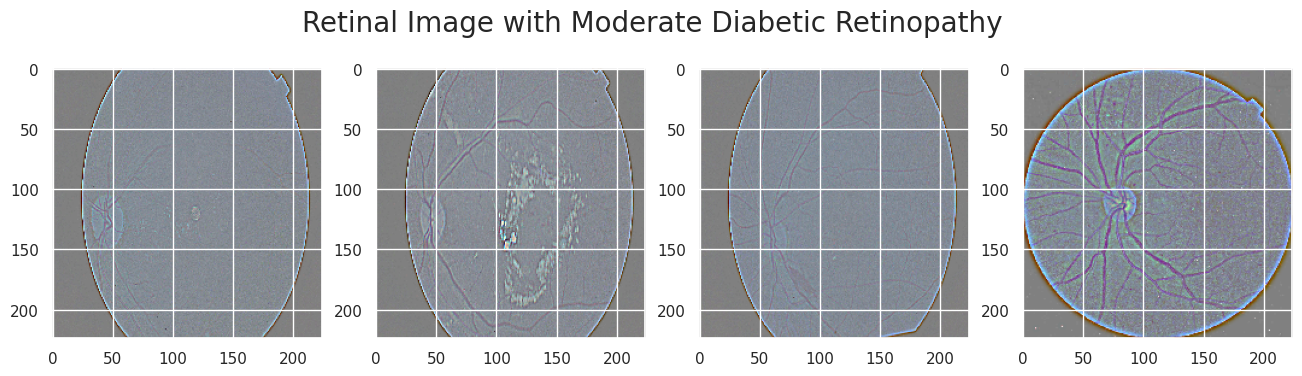

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Moderate/'+ Moderate_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Moderate Diabetic Retinopathy",fontsize=20)
plt.show()

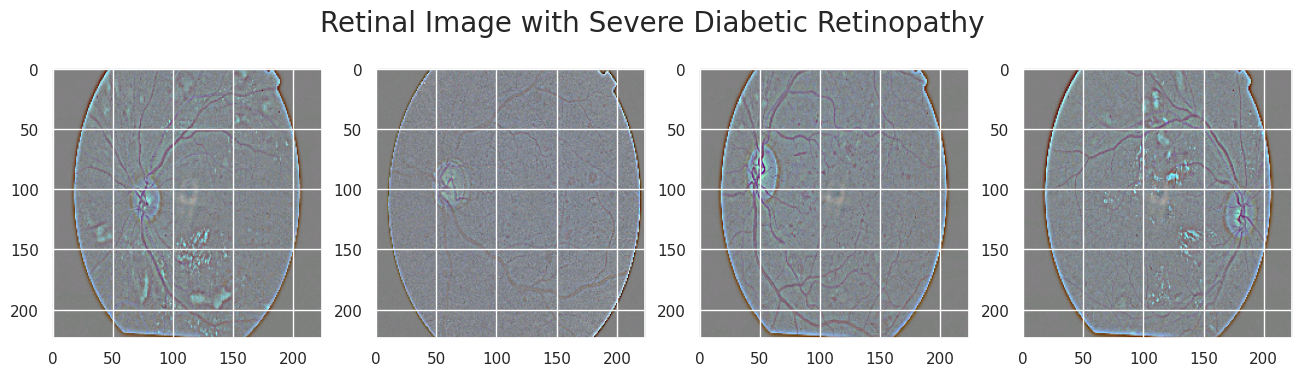

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Severe/'+ Severe_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Severe Diabetic Retinopathy",fontsize=20)
plt.show()

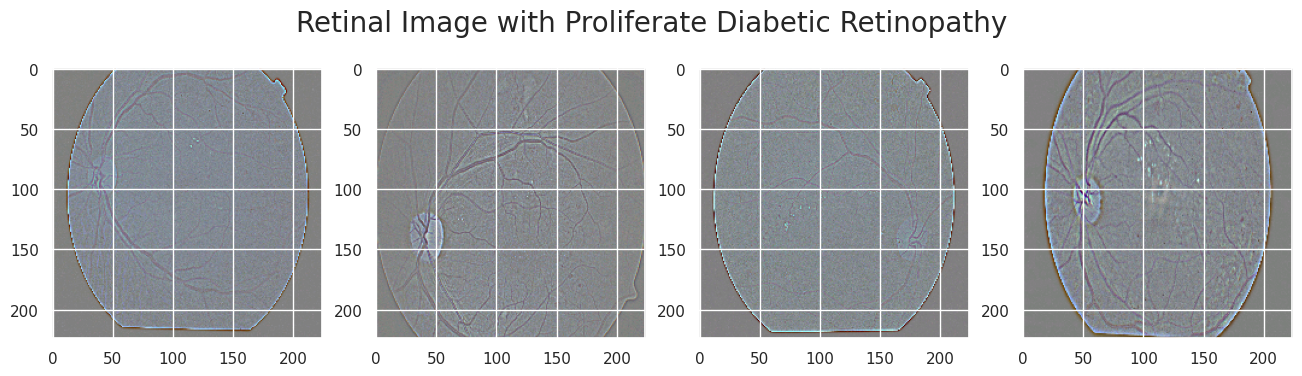

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Proliferate_DR/'+ Proliferate_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Proliferate Diabetic Retinopathy",fontsize=20)
plt.show()

In [ ]:
Classes = {'No_DR':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'Proliferate_DR':4}

In [ ]:
gc.collect()

89090

In [ ]:
#Normalizing pixel values
X = []
y = []
desired_size = (128, 128)

for i in Classes:
    folder_path ='drive/MyDrive/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/' +i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path+'/'+j)
        img = cv2.resize(img, desired_size)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [ ]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((3662, 128, 128, 3), (3662,))

In [ ]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [ ]:
from imblearn.over_sampling import SMOTE
# Using SMOTE to oversample the minority class(Edema) to avoid class imbalance
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X.reshape(X.shape[0], -1), y.ravel())

In [ ]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [ ]:
X[0].shape

(49152,)

In [ ]:
X = X.reshape(X.shape[0], 128, 128, 3)


In [ ]:
X[0].shape

(128, 128, 3)

In [ ]:
gc.collect()

12684

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)
#used stratify to balance the number of examples for each class

In [ ]:
X_train.shape

(7220, 128, 128, 3)

In [ ]:
X_test.shape

(1805, 128, 128, 3)

In [ ]:
X_train.size

354877440

In [ ]:
X_test.size

88719360

In [ ]:
# Reshape the arrays
X_train = X_train.reshape((-1, 128, 128, 3))
X_test = X_test.reshape((-1, 128, 128, 3))

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

In [ ]:
model = DenseNet121(input_shape=(128, 128, 3),weights='imagenet',include_top=False)

In [ ]:
model.trainable = True

set_trainable = False

for layer in model.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
for layer in model.layers[:]:
    if ('bn' in layer.name):
        trainable = False

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [ ]:
x = Flatten()(model.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
prediction = Dense(5,activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 134, 134, 3)  0          ['input_6[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_10[0][0]']      
                                                                                            

In [ ]:
gc.collect()

1077

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#Early Stopping

es = EarlyStopping(monitor='val_accuracy', min_delta = 0.005, patience=10, verbose=1, mode='auto')

#Model Check Point

mc = ModelCheckpoint(monitor='val_accuracy', filepath = 'densenet121_model.h5', verbose=1, save_best_only = True, mode='auto')

cd = [es,mc]

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = adam,
              metrics=['accuracy']
)

In [ ]:

gc.collect()

0

In [ ]:
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

In [ ]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs=45,
          callbacks=cd,
          batch_size=64,
          shuffle=True)


print(model.history.history.keys())

Epoch 1/45
113/113 [==============================] - ETA: 0s - loss: 1.6128 - accuracy: 0.3952
Epoch 1: val_accuracy improved from -inf to 0.50582, saving model to densenet121_model.h5
113/113 [==============================] - 20s 106ms/step - loss: 1.6128 - accuracy: 0.3952 - val_loss: 1.1933 - val_accuracy: 0.5058
Epoch 2/45
113/113 [==============================] - ETA: 0s - loss: 1.1604 - accuracy: 0.5230
Epoch 2: val_accuracy improved from 0.50582 to 0.57008, saving model to densenet121_model.h5
113/113 [==============================] - 9s 83ms/step - loss: 1.1604 - accuracy: 0.5230 - val_loss: 1.0342 - val_accuracy: 0.5701
Epoch 3/45
113/113 [==============================] - ETA: 0s - loss: 1.0319 - accuracy: 0.5837
Epoch 3: val_accuracy improved from 0.57008 to 0.61607, saving model to densenet121_model.h5
113/113 [==============================] - 9s 84ms/step - loss: 1.0319 - accuracy: 0.5837 - val_loss: 0.9491 - val_accuracy: 0.6161
Epoch 4/45
113/113 [==================

In [ ]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)

In [ ]:
print(model.history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']


In [ ]:
print("Training Accuracy:", round(train_acc[-1], 2))
print("Training Loss:", round(train_loss[-1], 2))
print("Validation Accuracy:", round(val_acc[-1], 2))
print("Validation Loss:", round(val_loss[-1], 2))

Training Accuracy: 0.96
Training Loss: 0.17
Validation Accuracy: 0.91
Validation Loss: 0.29


In [ ]:

gc.collect()

1556

In [ ]:
def plot_metrics(history):
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.ylim(0, max(max(train_loss), max(val_loss)))  # Set y-axis limits for loss graph
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.ylim(0, 1)  # Set y-axis limits for accuracy graph to start from zero
    plt.show()



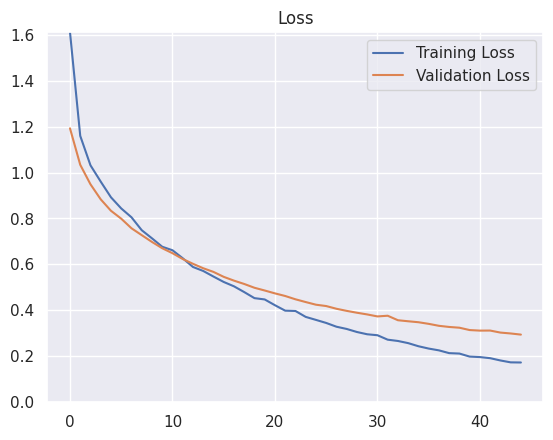

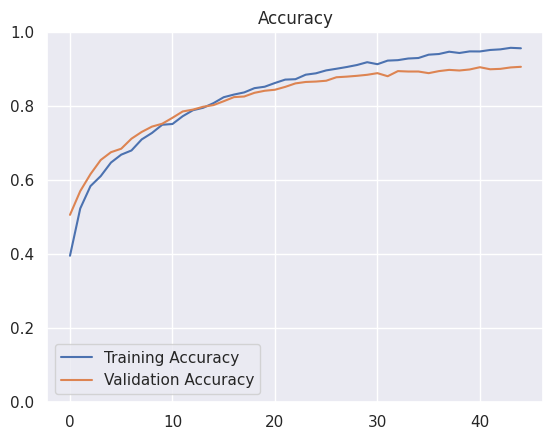

In [ ]:
plot_metrics(history)

In [ ]:
def plot_metrics(history):
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.ylim(0, max(max(train_loss), max(val_loss)))  # Set y-axis limits for loss graph
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.ylim(0, 1)  # Set y-axis limits for accuracy graph
    plt.show()


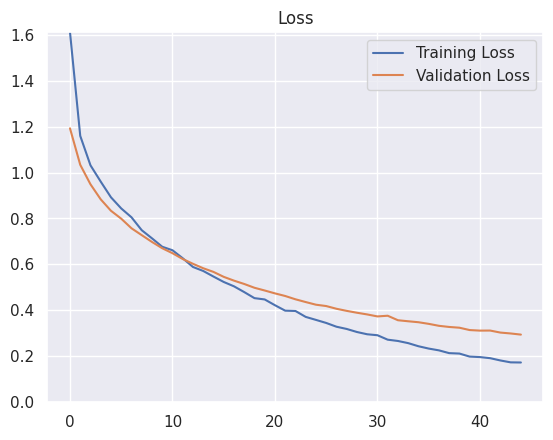

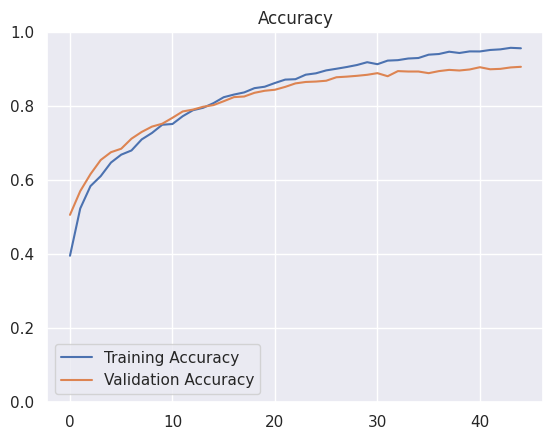

In [ ]:
plot_metrics(history)

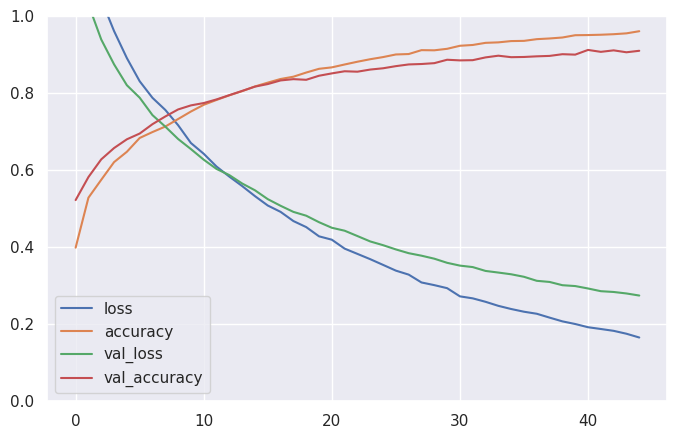

In [ ]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model = load_model('densenet121_model.h5')

In [ ]:
Model_evaluation = model.evaluate(X_train, y_train)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

226/226 [==============================] - 9s 33ms/step - loss: 0.1102 - accuracy: 0.9834
%
Accuracy: 98.3379 %


In [ ]:
y_predicted_tf = model.predict(X_test)

57/57 [==============================] - 4s 31ms/step


In [ ]:
y_predicted_tf

array([[9.9690467e-01, 2.5126603e-04, 2.3861397e-03, 1.9800401e-04,
        2.5988219e-04],
       [1.1833913e-03, 9.8372436e-01, 1.0455430e-02, 4.7981219e-05,
        4.5888936e-03],
       [3.2681349e-04, 2.5917641e-03, 3.0013237e-03, 1.2744390e-02,
        9.8133576e-01],
       ...,
       [1.6265739e-02, 3.2024044e-01, 5.2904892e-01, 1.5962888e-02,
        1.1848200e-01],
       [9.4334239e-01, 2.3950664e-02, 3.0822400e-02, 1.1899839e-03,
        6.9452939e-04],
       [5.4188040e-03, 1.7952772e-02, 9.1499686e-01, 3.5896589e-04,
        6.1272688e-02]], dtype=float32)

In [ ]:
y_test

array([0, 1, 4, ..., 1, 0, 2])

In [ ]:
y_predicted_tf[0]

array([9.9690467e-01, 2.5126603e-04, 2.3861397e-03, 1.9800401e-04,
       2.5988219e-04], dtype=float32)

In [ ]:
y_predicted = np.argmax(y_predicted_tf,axis=1)


In [ ]:
y_predicted

array([0, 1, 4, ..., 2, 0, 2])

In [ ]:
len(y_predicted)

1805

In [ ]:
len(y_test)

1805

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

Y_test  Y_predicted
0       0            0
1       1            1
2       4            4
3       4            4
4       0            0
5       1            1
6       1            1
7       3            3

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
f1_score(y_test, y_predicted, average='micro')

0.9113573407202216

In [ ]:
recall_score(y_test, y_predicted, average='micro')

0.9113573407202216

In [ ]:
 precision_score(y_test, y_predicted, average='micro')

0.9113573407202216

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[351   3   3   1   3]
 [  4 327  21   2   7]
 [  8  21 297  20  15]
 [  1   2  10 345   3]
 [  1   6  16  13 325]]


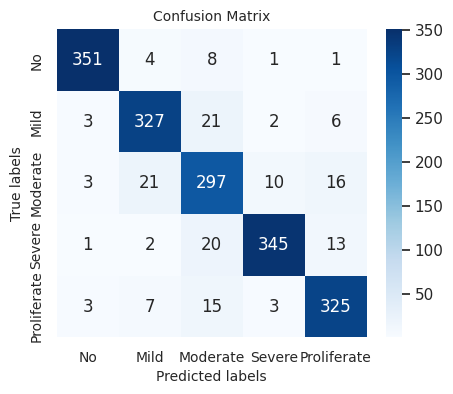

In [ ]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(5, 4))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10); ax.yaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10);

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = 'drive/MyDrive/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/05a5183c92d0.png'  # Provide the path to your image
img = image.load_img(img_path, target_size=(128, 128))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.  # Normalize pixel values to [0, 1]

# Predict class
predicted_classes = model.predict(img_array)
predicted_class_index = np.argmax(predicted_classes)

# Map predicted class index to class label
class_labels = ['No', 'Mild', 'Moderate', 'Severe', 'Proliferate']  # Assuming these are your class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class label:", predicted_class_label)


1/1 [==============================] - 0s 30ms/step
Predicted class label: Mild


In [ ]:
model.save("densenet121_model.h5")
print("Model downloaded successfully.")



Model downloaded successfully.


###